In [321]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [323]:
df = pd.read_csv('stock_final.csv')
df.head()

,datetime,company,open,high,low,close,volume
0,12/29/2023 15:30,AMZN,152.12500,152.39999,151.78000,151.95000,5651698
1,12/29/2023 15:00,AMZN,152.38499,152.39000,151.92500,152.12990,2230674
2,12/29/2023 14:30,AMZN,152.33501,152.47000,152.28999,152.39000,1203470
3,12/29/2023 14:00,AMZN,152.46500,152.50999,152.33000,152.33611,1119001
4,12/29/2023 13:30,AMZN,152.29559,152.55000,152.24001,152.45010,1054176


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34409 entries, 0 to 34408
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  34409 non-null  object 
 1   company   34409 non-null  object 
 2   open      34409 non-null  float64
 3   high      34409 non-null  float64
 4   low       34409 non-null  float64
 5   close     34409 non-null  float64
 6   volume    34409 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [327]:
df['time'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')

# Filter for rows where the time is 15:30
filtered_df = df[df['time'].dt.time == pd.to_datetime('15:30', format='%H:%M').time()]


In [329]:
company_list = ['AMZN', 'AAPL', 'CRM', 'MSFT', 'NVDA', 'INTC']
filtered_df = filtered_df.sort_values(by='time')
filtered_df.head(10)

,datetime,company,open,high,low,close,volume,time
9718,1/3/2023 15:30,CRM,135.07500,135.20000,134.62500,134.75000,798829,2023-01-03 15:30:00
6475,1/3/2023 15:30,AAPL,124.63000,125.42000,124.62500,125.05000,10631332,2023-01-03 15:30:00
16206,1/3/2023 15:30,NVDA,14.34500,14.37550,14.29100,14.31500,31902650,2023-01-03 15:30:00
12962,1/3/2023 15:30,MSFT,239.47000,239.92999,239.22000,239.53999,2210603,2023-01-03 15:30:00
3231,1/3/2023 15:30,AMZN,86.21000,86.49000,85.77000,85.82000,7385734,2023-01-03 15:30:00
19449,1/3/2023 15:30,INTC,26.78000,26.82000,26.69000,26.72000,4137725,2023-01-03 15:30:00
19436,1/4/2023 15:30,INTC,27.60000,27.71000,27.46000,27.68500,5538382,2023-01-04 15:30:00
6462,1/4/2023 15:30,AAPL,125.83990,126.48000,125.28000,126.38000,8384124,2023-01-04 15:30:00
12949,1/4/2023 15:30,MSFT,227.64999,229.35001,226.53999,229.07970,5089090,2023-01-04 15:30:00
9705,1/4/2023 15:30,CRM,138.96001,139.69000,138.42999,139.59000,1542366,2023-01-04 15:30:00


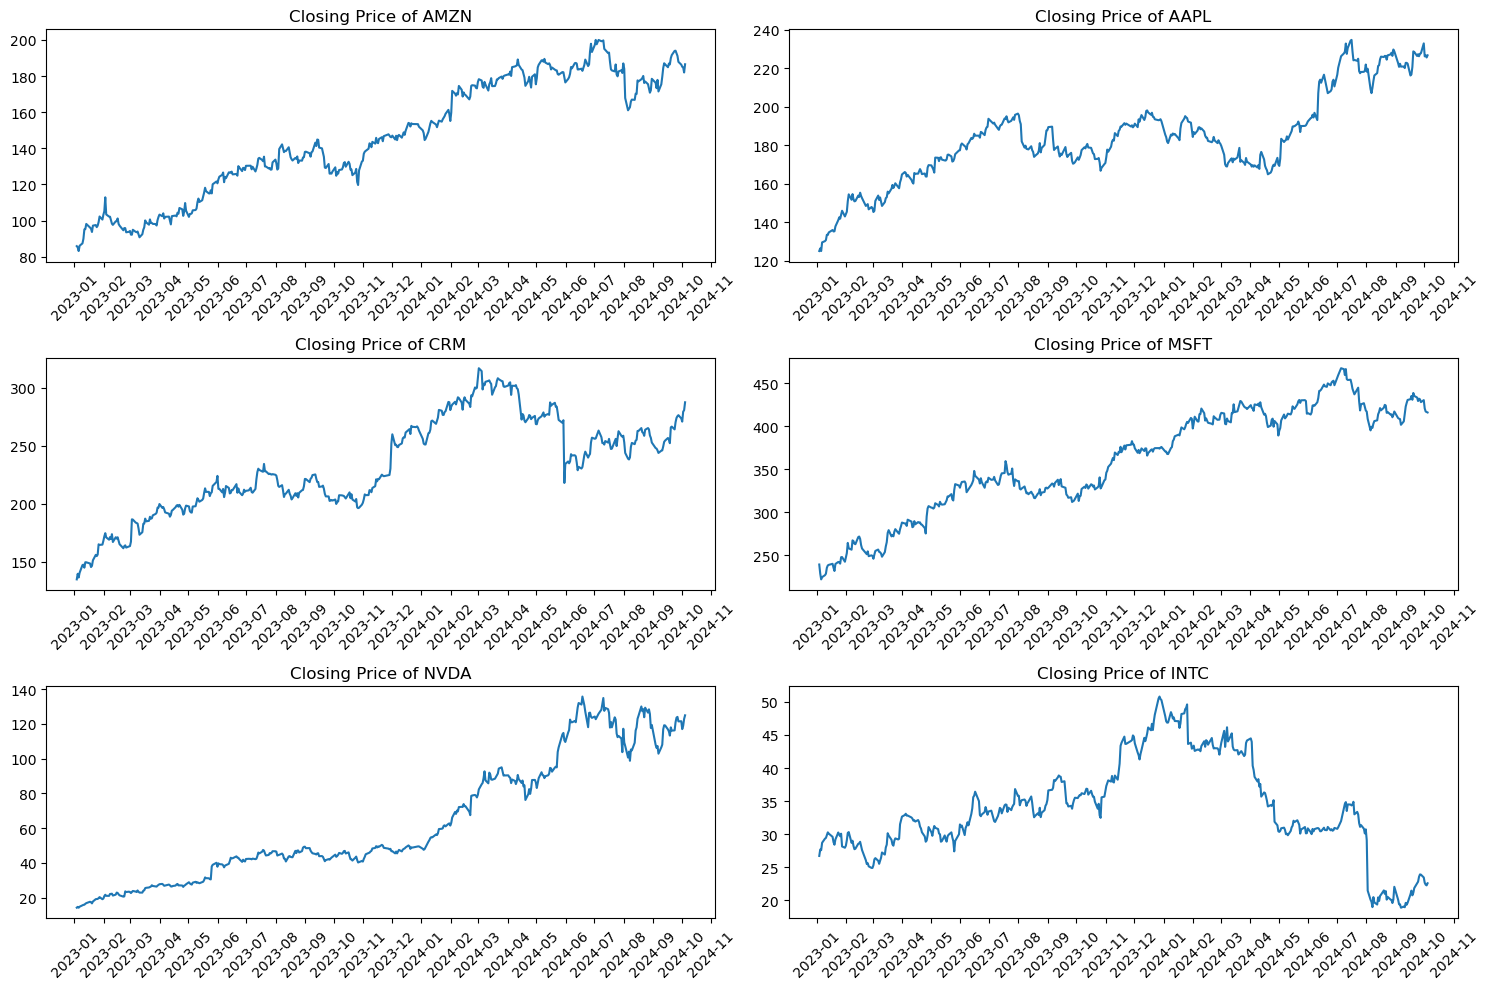

In [331]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list):
    ax = axes[i // 2, i % 2]

    # Select the data for the current company
    y = filtered_df[filtered_df['company'] == company]['close']
    x = filtered_df[filtered_df['company'] == company]['time']
    
    # Format the x-axis
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

    # Plot the data on the current axis
    ax.plot(x, y)
    
    # Set the title for the current subplot
    ax.set_title(f"Closing Price of {company}")

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plots
plt.show()


/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_90850/2060632257.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['close'].rolling(ma).mean()
/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_90850/2060632257.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['close'].rolling(ma).mean()
/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_90850/2060632257.py:17: SettingWithCopyWarning: 
A value is trying to be set 

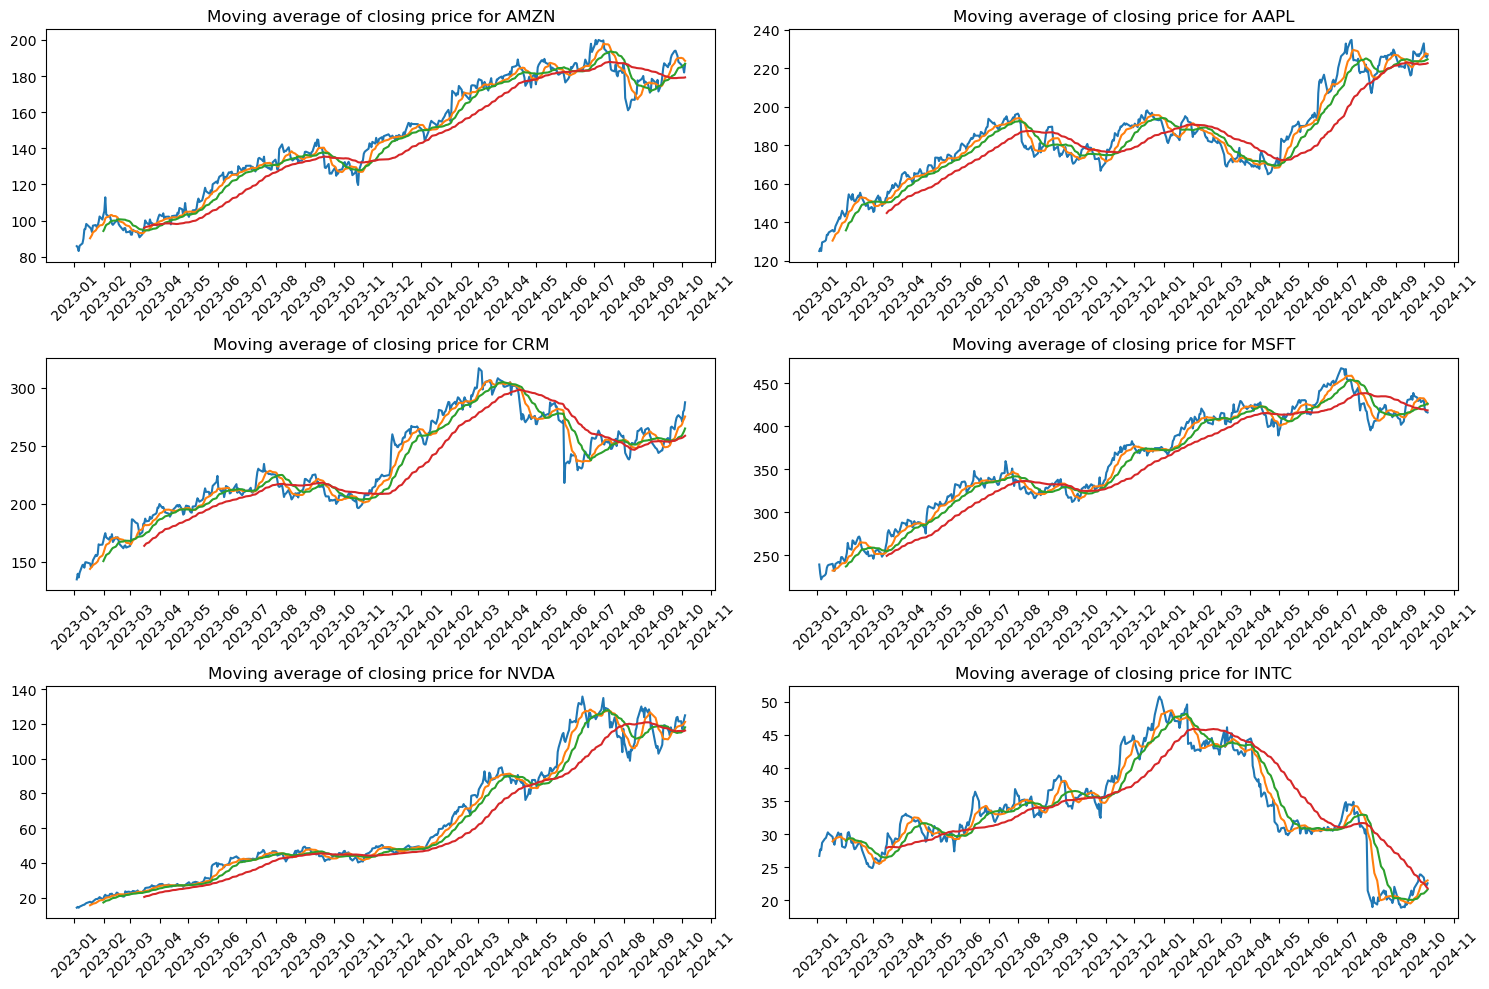

In [355]:
ma_day = [10, 20, 50]



AAPL = filtered_df[filtered_df['company']=='AAPL']
AMZN = filtered_df[filtered_df['company']=='AMZN']
CRM = filtered_df[filtered_df['company']=='CRM']
MSFT = filtered_df[filtered_df['company']=='MSFT']
NVDA = filtered_df[filtered_df['company']=='NVDA']
INTC = filtered_df[filtered_df['company']=='INTC']

companies = [AMZN, AAPL, CRM, MSFT, NVDA, INTC]

for ma in ma_day:
    for company in companies:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate (companies,1):
    plt.subplot(3,2,i)
    y=company[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]
    x=company['time']
    plt.plot(x,y)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.title(f"Moving average of closing price for {company['company'].iloc[0]}")

    plt.xticks(rotation=45)



fig.tight_layout()

/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_90850/2889159471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['Daily Return'] = AAPL['close'].pct_change()
/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_90850/2889159471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN['Daily Return'] = AMZN['close'].pct_change()
/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_90850/2889159471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

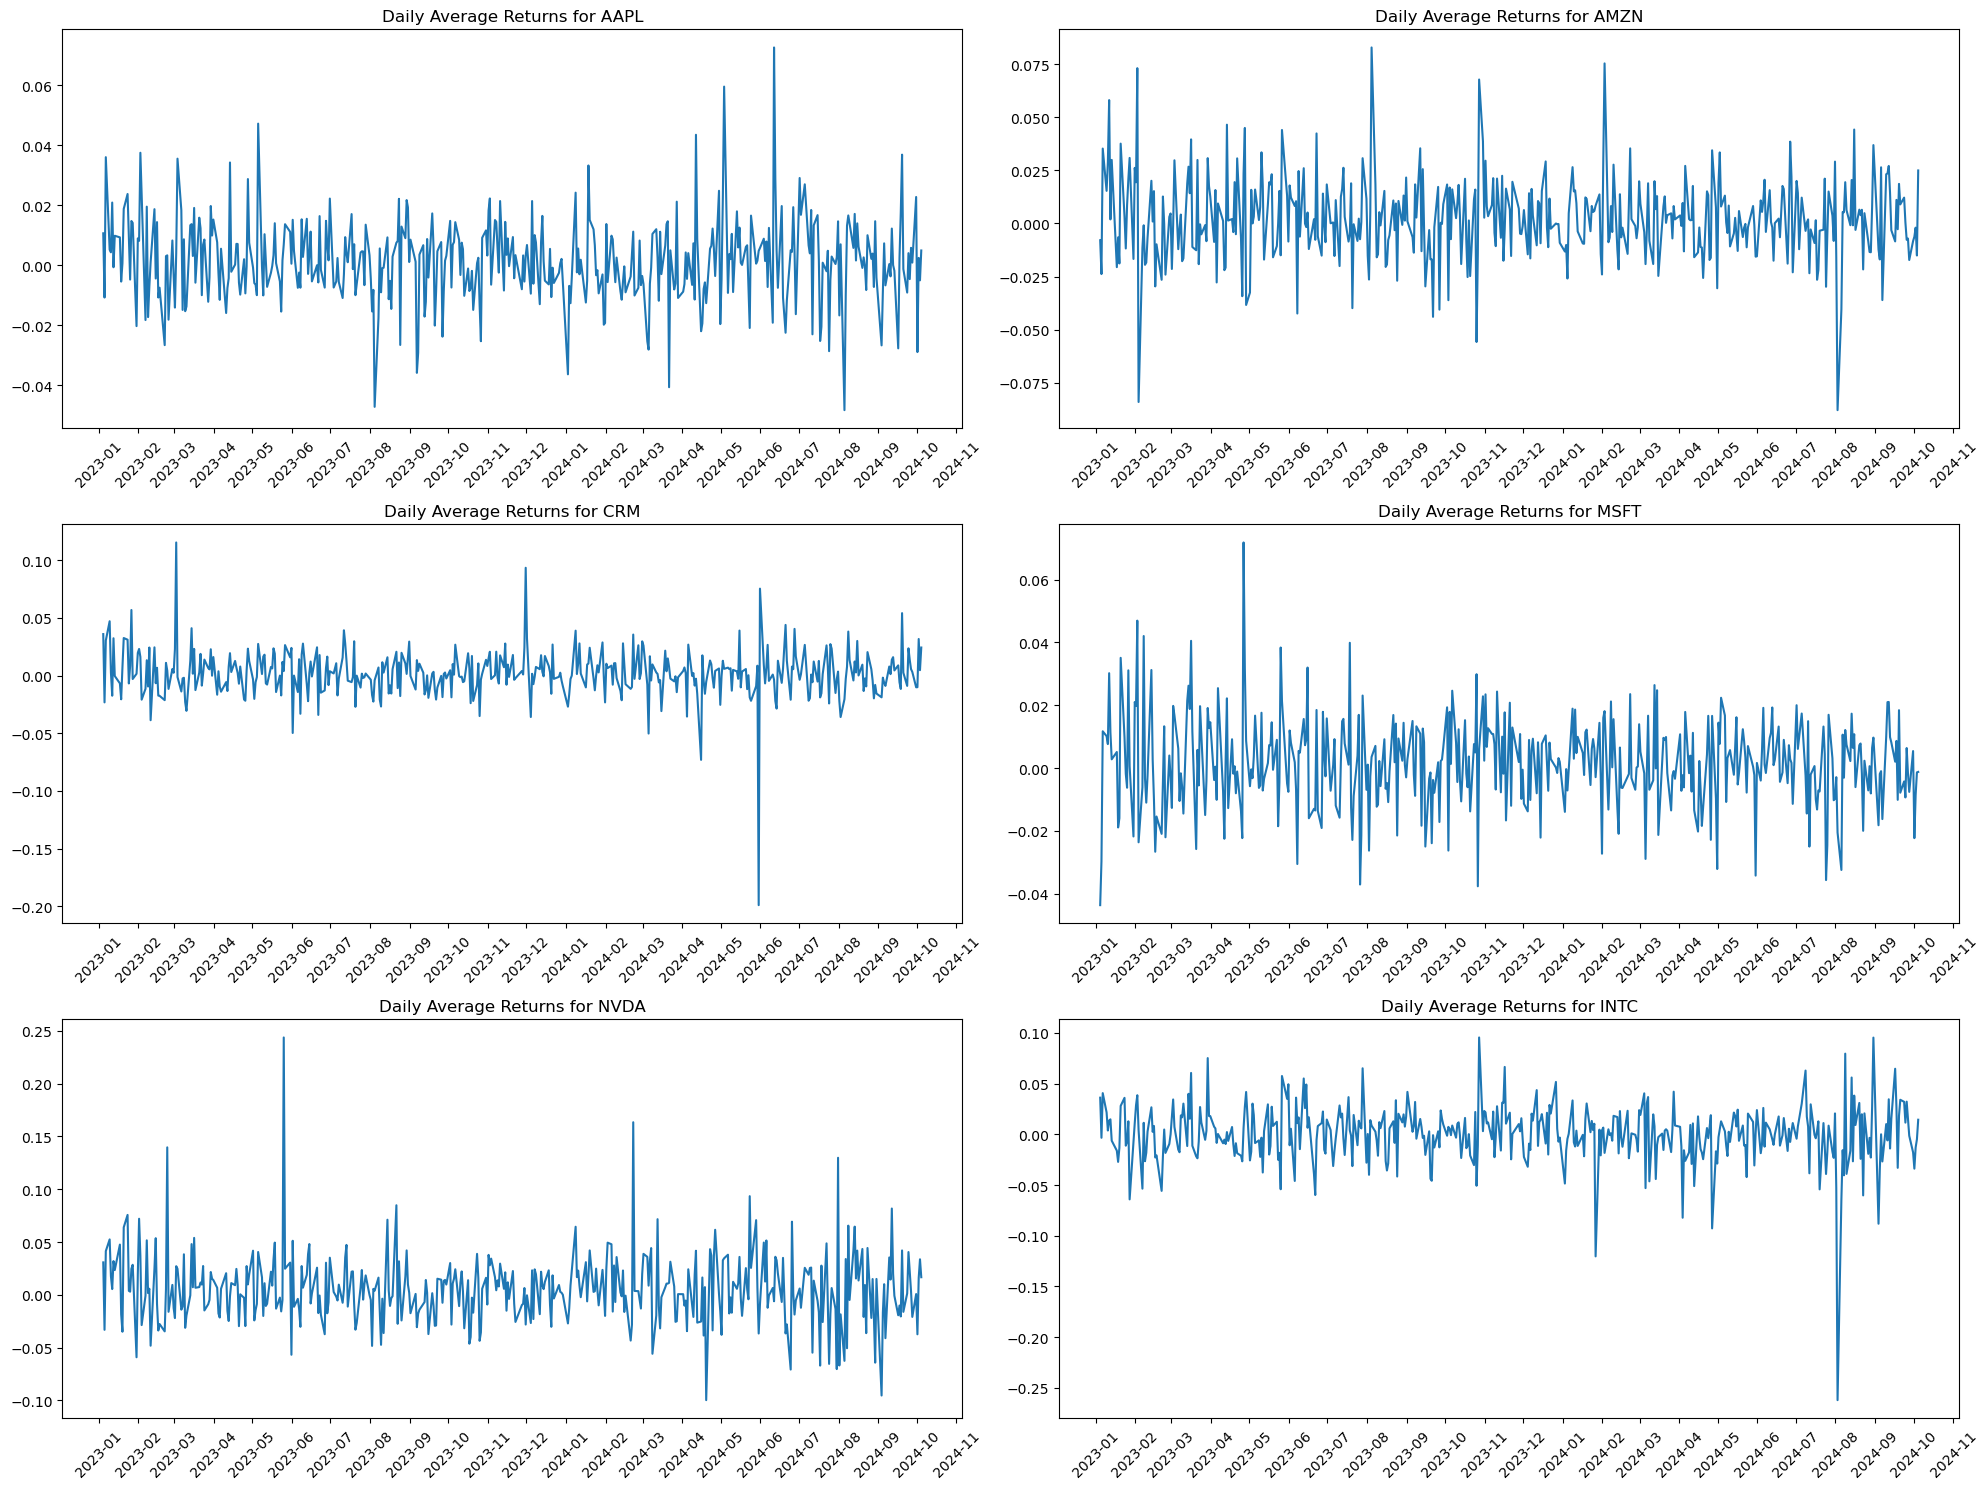

In [367]:
# Calculate daily returns for each company
AAPL['Daily Return'] = AAPL['close'].pct_change()
AMZN['Daily Return'] = AMZN['close'].pct_change()
CRM['Daily Return'] = CRM['close'].pct_change()
MSFT['Daily Return'] = MSFT['close'].pct_change()
NVDA['Daily Return'] = NVDA['close'].pct_change()
INTC['Daily Return'] = INTC['close'].pct_change()

companies = [AAPL, AMZN, CRM, MSFT, NVDA, INTC]

# Set up the plot with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

# Loop through the companies and plot the data on each corresponding subplot
for i, company in enumerate(companies):
    ax = axes[i // 2, i % 2]  # Get the current axis based on the index
    
    # Plot the daily return for each company
    x = company['time']
    y = company['Daily Return']
    ax.plot(x, y)

    # Set x-axis tick formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

    # Set the title for the current subplot
    ax.set_title(f"Daily Average Returns for {company['company'].iloc[0]}")

# Adjust the layout to prevent overlapping
fig.tight_layout()

plt.savefig('daily_returns.jpg', format='jpg', dpi=900)
# Show the plot
plt.show()


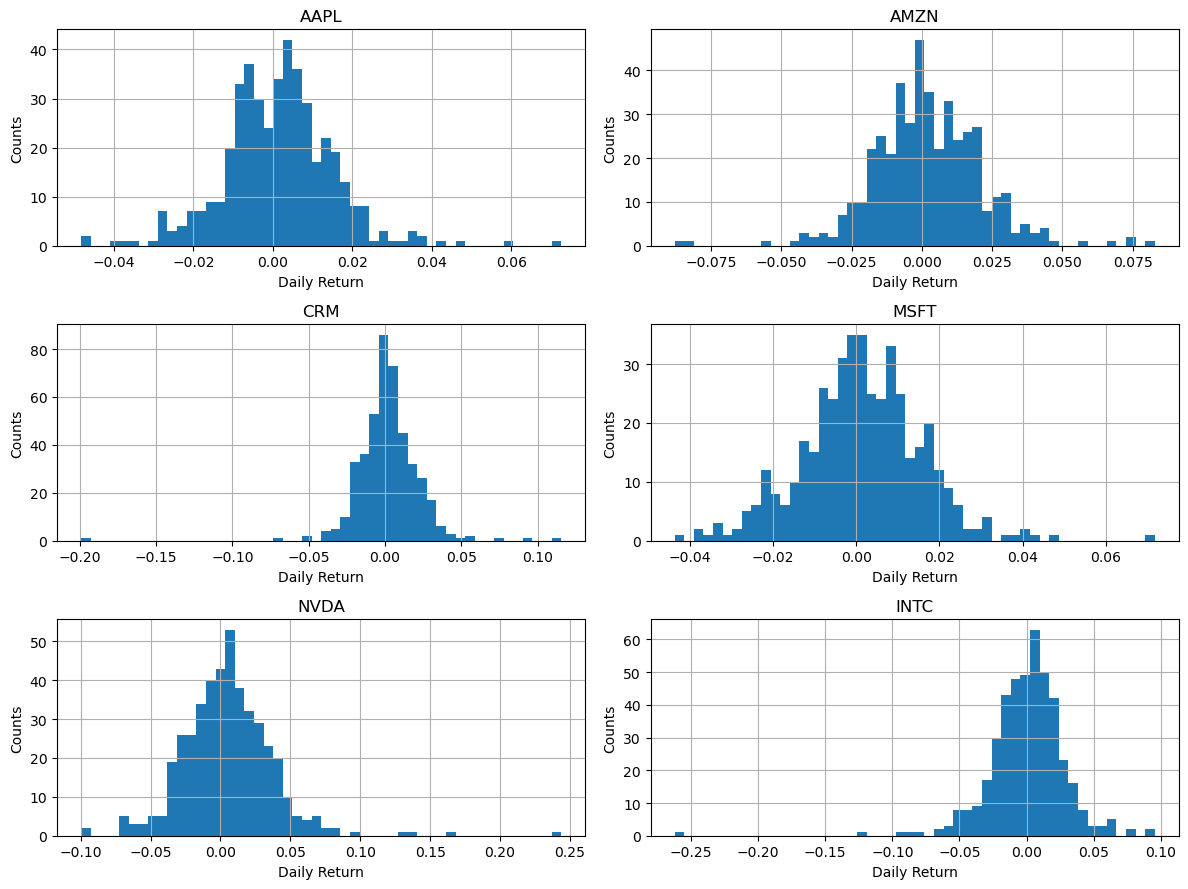

In [369]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(companies, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    
    plt.title(f'{company['company'].iloc[0]}')
    
plt.tight_layout()

In [339]:
AAPL.head()

,datetime,company,open,high,low,close,volume,time,Daily Return
6475,1/3/2023 15:30,AAPL,124.63000,125.42000,124.625,125.05,10631332,2023-01-03 15:30:00,NaN
6462,1/4/2023 15:30,AAPL,125.83990,126.48000,125.280,126.38,8384124,2023-01-04 15:30:00,0.010636
6449,1/5/2023 15:30,AAPL,125.17000,125.30000,124.760,125.02,9464321,2023-01-05 15:30:00,-0.010761
6436,1/6/2023 15:30,AAPL,129.81500,130.05000,129.340,129.52,9922349,2023-01-06 15:30:00,0.035994
6423,1/9/2023 15:30,AAPL,130.44501,130.57001,129.890,130.19,6115920,2023-01-09 15:30:00,0.005173


In [341]:
# Create the initial DataFrame for Apple
daily_return_df = AAPL[['time', 'Daily Return']].rename(columns={'time': 'Date', 'Daily Return': 'AAPL'})

# List of other companies DataFrames
other_companies = [AMZN, CRM, MSFT, NVDA, INTC]

# Loop through each other company's DataFrame
for company in other_companies:
    # Create daily return DataFrame for the current company
    daily_return_temp = company[['time', 'Daily Return']].rename(columns={'time': 'Date', 'Daily Return': f'{company["company"].iloc[0]}'})
    
    # Merge with the existing daily_return_df
    daily_return_df = pd.merge(daily_return_df, daily_return_temp, on='Date', how='left')

In [343]:
daily_return_df.head()

,Date,AAPL,AMZN,CRM,MSFT,NVDA,INTC
0,2023-01-03 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-04 15:30:00,0.010636,-0.007924,0.035918,-0.043668,0.030737,0.036115
2,2023-01-05 15:30:00,-0.010761,-0.023843,-0.023282,-0.029726,-0.033141,-0.003431
3,2023-01-06 15:30:00,0.035994,0.035254,0.030365,0.011697,0.041427,0.040594
4,2023-01-09 15:30:00,0.005173,0.015343,0.047053,0.010139,0.052501,0.021595


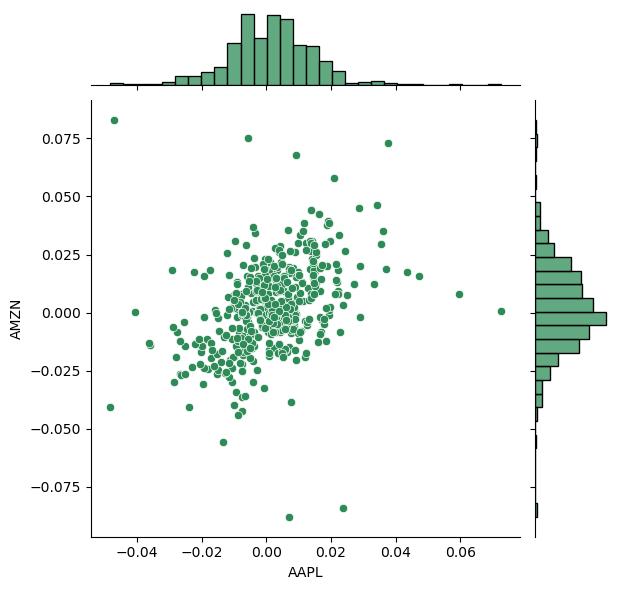

In [345]:
sns.jointplot(x='AAPL', y='AMZN', data=daily_return_df, kind='scatter', color='seagreen')

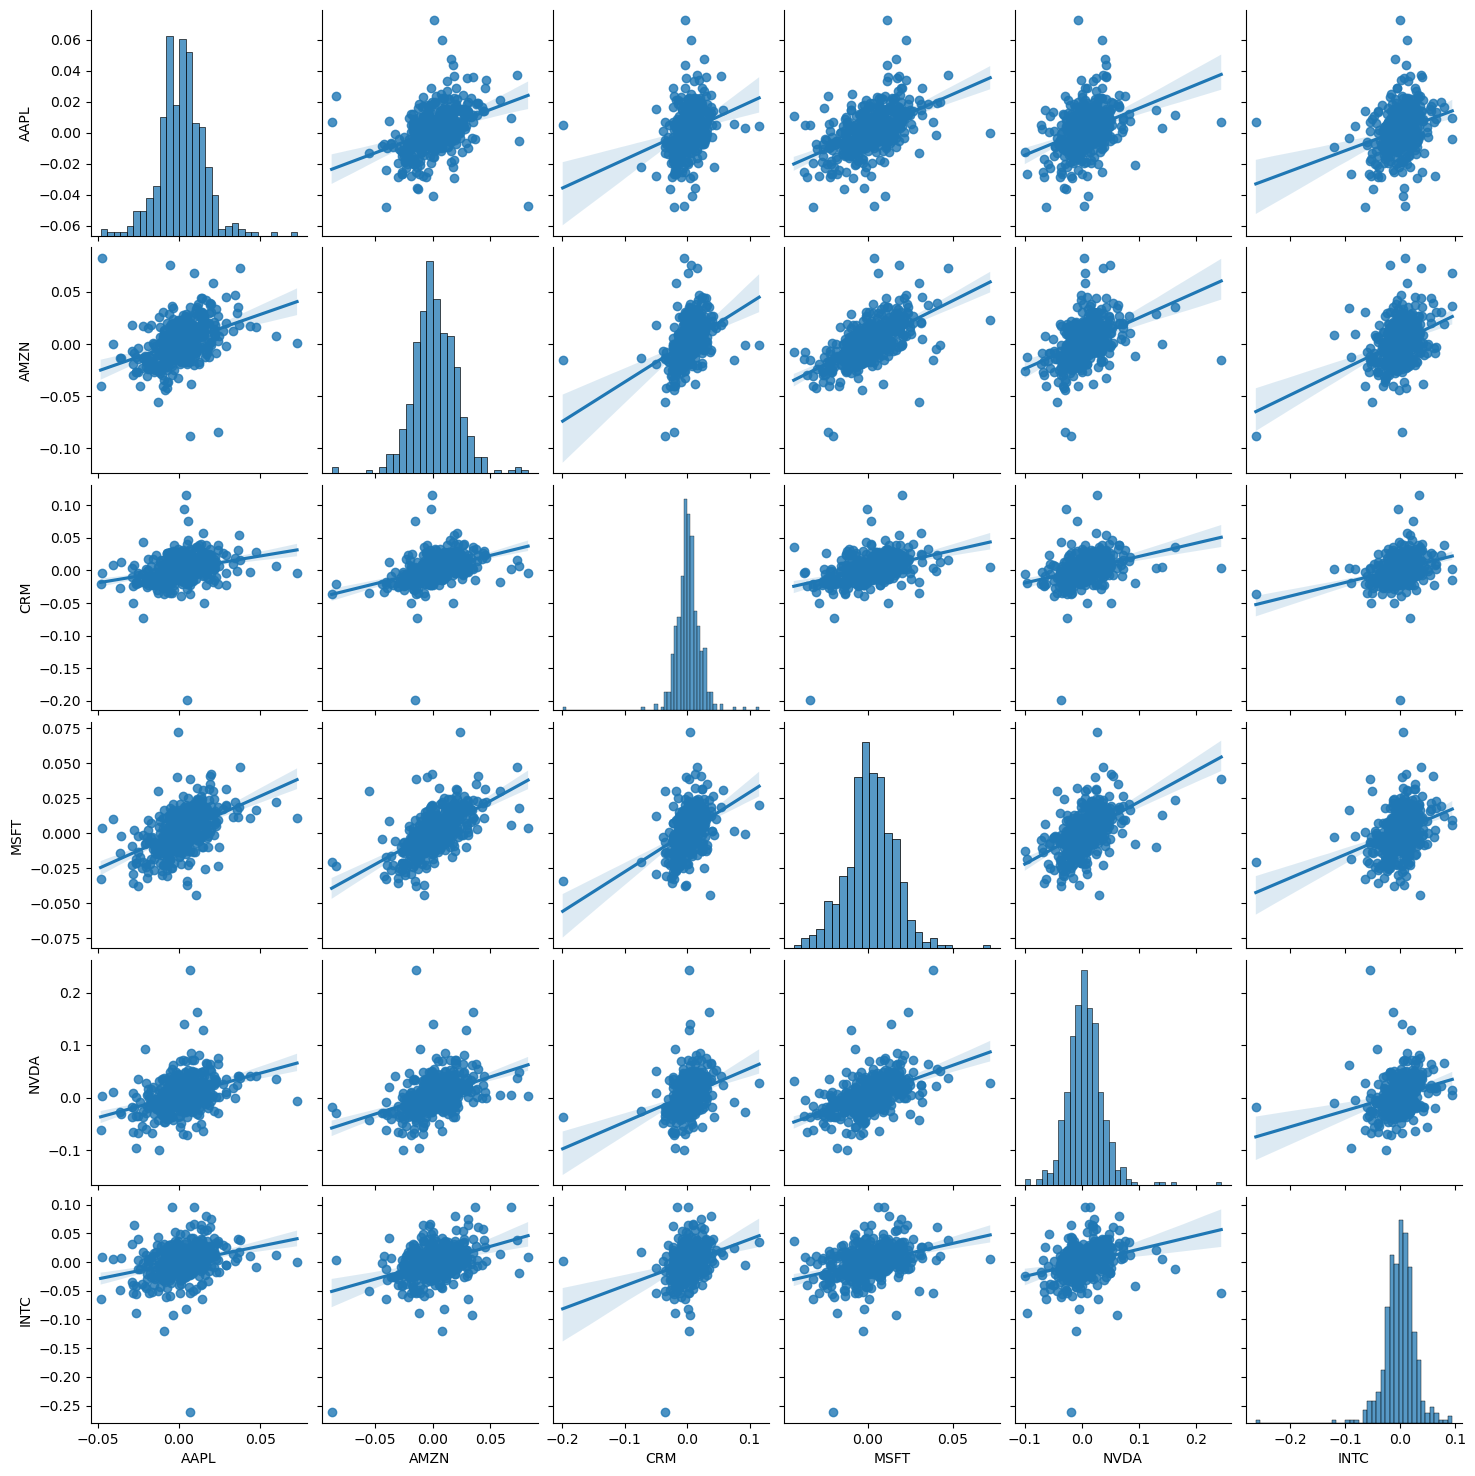

In [347]:
sns.pairplot(daily_return_df, kind='reg')

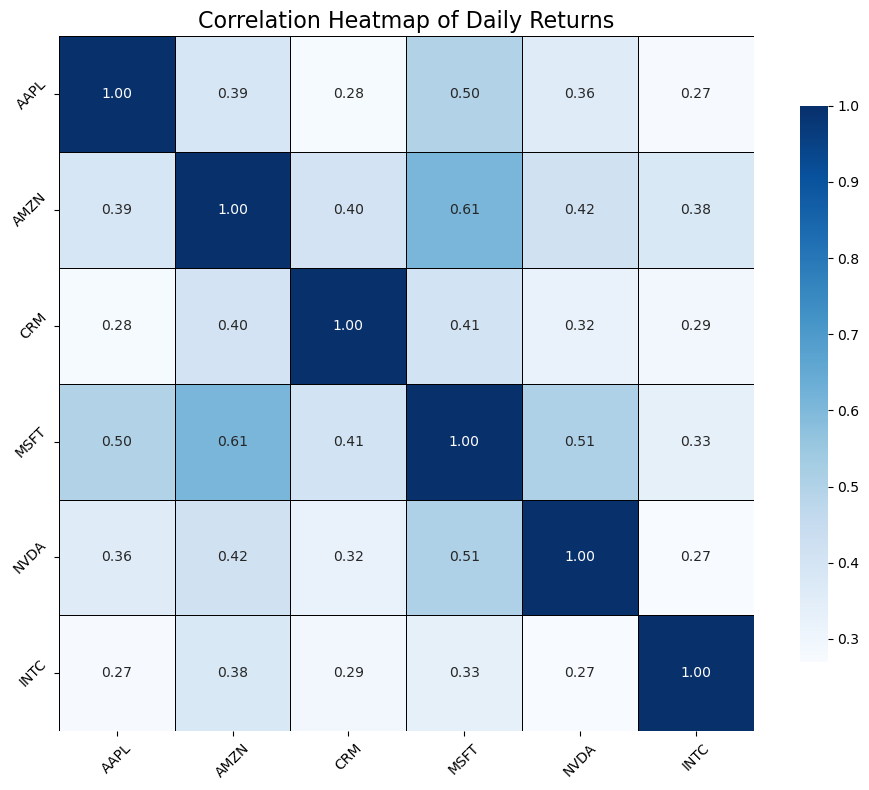

In [313]:
corr = daily_return_df.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=True, cbar_kws={"shrink": .8}, 
            linewidths=.5, linecolor='black')

# Set title and labels
plt.title('Correlation Heatmap of Daily Returns', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels

# Show the plot
plt.show()

In [317]:
daily_return_df.head()

,AAPL,AMZN,CRM,MSFT,NVDA,INTC
Date,,,,,,
2023-01-03 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04 15:30:00,0.010636,-0.007924,0.035918,-0.043668,0.030737,0.036115
2023-01-05 15:30:00,-0.010761,-0.023843,-0.023282,-0.029726,-0.033141,-0.003431
2023-01-06 15:30:00,0.035994,0.035254,0.030365,0.011697,0.041427,0.040594
2023-01-09 15:30:00,0.005173,0.015343,0.047053,0.010139,0.052501,0.021595


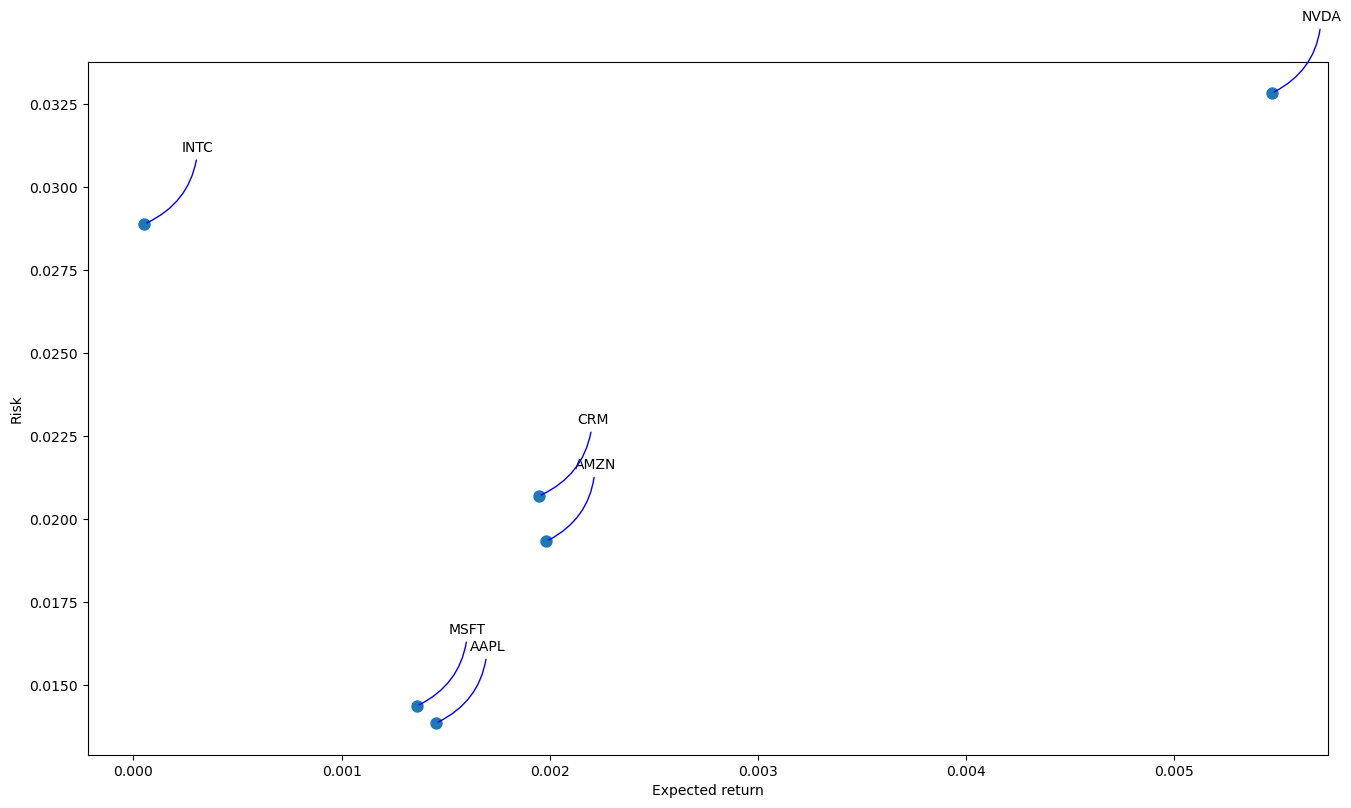

In [319]:
rets = daily_return_df.dropna()

area = np.pi * 20

plt.figure(figsize=(16, 9))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))